# **A. PERFILADO  DE LOS DATOS**

In [1]:
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

In [2]:
data= pd.read_csv("/content/osb_conductasuicida_ideacioneintentoasdwadw.csv")
data.head()

,ano_notificacion,codigo_localidadresidencia,localidad_residencia,nombre_upz,ciclovital,clasificaciondelaconducta,sexo,edad,niveleducativo,enfermedades_dolorosas,maltrato_sexual,muerte_familiar,conflicto_pareja,problemas_economicos,esc_educ,problemas_juridicos,problemas_laborales,suicidio_amigo,poblacion_diferencial
0,2012,5.0,Usme,UPZ Sin asignar,18 – 28 Juventud,Intento de Suicidio,Hombre,21,5. Secundaria incompleta,0,0,0,0,0,0,0,0,0,Otra
1,2012,5.0,Usme,UPZ Sin asignar,18 – 28 Juventud,Intento de Suicidio,Hombre,20,5. Secundaria incompleta,0,0,0,0,0,0,0,0,0,Otra
2,2012,5.0,Usme,UPZ Sin asignar,18 – 28 Juventud,Intento de Suicidio,Hombre,20,5. Secundaria incompleta,0,0,0,0,0,0,0,0,0,Otra
3,2012,6.0,Tunjuelito,UPZ Sin asignar,18 – 28 Juventud,Ideación suicida,Hombre,19,5. Secundaria incompleta,0,0,0,0,0,0,0,0,0,Otra
4,2012,5.0,Usme,UPZ Sin asignar,18 – 28 Juventud,Intento de Suicidio,Mujer,24,8. Técnico post-secundaria completa,0,0,0,0,0,0,0,0,0,Otra


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198199 entries, 0 to 198198
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ano_notificacion            198199 non-null  int64  
 1   codigo_localidadresidencia  198102 non-null  float64
 2   localidad_residencia        198199 non-null  object 
 3   nombre_upz                  198199 non-null  object 
 4   ciclovital                  198199 non-null  object 
 5   clasificaciondelaconducta   198199 non-null  object 
 6   sexo                        198199 non-null  object 
 7   edad                        198199 non-null  int64  
 8   niveleducativo              198199 non-null  object 
 9   enfermedades_dolorosas      198199 non-null  int64  
 10  maltrato_sexual             198199 non-null  int64  
 11  muerte_familiar             198199 non-null  int64  
 12  conflicto_pareja            198199 non-null  int64  
 13  problemas_econ

In [4]:
data['localidad_residencia']=data['localidad_residencia'].astype('category')
data['nombre_upz']=data['nombre_upz'].astype('category')
data['ciclovital']=data['ciclovital'].astype('category')
data['clasificaciondelaconducta']=data['clasificaciondelaconducta'].astype('category')
data['sexo']=data['sexo'].astype('category')
data['niveleducativo']=data['niveleducativo'].astype('category')
data['poblacion_diferencial']=data['poblacion_diferencial'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198199 entries, 0 to 198198
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   ano_notificacion            198199 non-null  int64   
 1   codigo_localidadresidencia  198102 non-null  float64 
 2   localidad_residencia        198199 non-null  category
 3   nombre_upz                  198199 non-null  category
 4   ciclovital                  198199 non-null  category
 5   clasificaciondelaconducta   198199 non-null  category
 6   sexo                        198199 non-null  category
 7   edad                        198199 non-null  int64   
 8   niveleducativo              198199 non-null  category
 9   enfermedades_dolorosas      198199 non-null  int64   
 10  maltrato_sexual             198199 non-null  int64   
 11  muerte_familiar             198199 non-null  int64   
 12  conflicto_pareja            198199 non-null  int64   
 13 

In [5]:
!pip install ydata-profiling

In [6]:
from ydata_profiling import ProfileReport

profile_data=ProfileReport(data, minimal=False) # minimal=True
profile_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 19/19 [00:02<00:00,  6.61it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
profile_data.to_file(output_file="output.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **B. DIAGNÓSTICO**

# **C. LIMPIEZA  Y MEJORA DE LOS DATOS**

In [8]:
#Limpieza de datos nulos: Imputación por la media y moda
from sklearn.impute import SimpleImputer

#Imputacion de variables numéricas: media
ImpNumeros = SimpleImputer(missing_values=np.nan, strategy='mean')
data[['codigo_localidadresidencia']] = ImpNumeros.fit_transform(data[['codigo_localidadresidencia']])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198199 entries, 0 to 198198
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   ano_notificacion            198199 non-null  int64   
 1   codigo_localidadresidencia  198199 non-null  float64 
 2   localidad_residencia        198199 non-null  category
 3   nombre_upz                  198199 non-null  category
 4   ciclovital                  198199 non-null  category
 5   clasificaciondelaconducta   198199 non-null  category
 6   sexo                        198199 non-null  category
 7   edad                        198199 non-null  int64   
 8   niveleducativo              198199 non-null  category
 9   enfermedades_dolorosas      198199 non-null  int64   
 10  maltrato_sexual             198199 non-null  int64   
 11  muerte_familiar             198199 non-null  int64   
 12  conflicto_pareja            198199 non-null  int64   
 13 

In [9]:
print(ImpNumeros.statistics_)

[9.80648858]


**1. Análisis de correlaciones**

In [11]:
data_num = pd.get_dummies(data, drop_first=True, dtype=int)
data_num.head()

,ano_notificacion,codigo_localidadresidencia,edad,enfermedades_dolorosas,maltrato_sexual,muerte_familiar,conflicto_pareja,problemas_economicos,esc_educ,problemas_juridicos,...,niveleducativo_99. Sin dato,poblacion_diferencial_En Protección,poblacion_diferencial_Madre Cabeza de Hogar,poblacion_diferencial_Menor Abandonado,poblacion_diferencial_Ninguna,poblacion_diferencial_Otra,poblacion_diferencial_Otro tipo de víctima del conflicto,poblacion_diferencial_Población LGBTIQ+,poblacion_diferencial_Servidor público,poblacion_diferencial_Trabajador Informal
0,2012,5.0,21,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2012,5.0,20,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2012,5.0,20,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2012,6.0,19,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2012,5.0,24,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
data_num.corr()

,ano_notificacion,codigo_localidadresidencia,edad,enfermedades_dolorosas,maltrato_sexual,muerte_familiar,conflicto_pareja,problemas_economicos,esc_educ,problemas_juridicos,...,niveleducativo_99. Sin dato,poblacion_diferencial_En Protección,poblacion_diferencial_Madre Cabeza de Hogar,poblacion_diferencial_Menor Abandonado,poblacion_diferencial_Ninguna,poblacion_diferencial_Otra,poblacion_diferencial_Otro tipo de víctima del conflicto,poblacion_diferencial_Población LGBTIQ+,poblacion_diferencial_Servidor público,poblacion_diferencial_Trabajador Informal
ano_notificacion,1.000000,-0.030310,0.031918,0.010122,0.080663,-0.162094,0.044574,-0.084120,0.040228,0.041486,...,-0.068688,0.007487,0.036433,0.002414,0.295909,-0.348295,-0.108123,0.064434,-0.000612,0.011022
codigo_localidadresidencia,-0.030310,1.000000,-0.020481,-0.000657,-0.005533,0.011917,-0.012694,-0.001858,0.002313,-0.011012,...,-0.001101,0.006825,-0.002097,0.002059,-0.016491,0.016956,0.007097,-0.003768,0.008346,-0.001953
edad,0.031918,-0.020481,1.000000,0.239557,-0.042183,0.061606,0.193425,0.215841,-0.376108,0.054845,...,0.066389,-0.019546,0.088909,-0.008024,-0.020397,-0.015432,0.008489,-0.013352,0.032404,0.057138
enfermedades_dolorosas,0.010122,-0.000657,0.239557,1.000000,-0.041644,0.021674,-0.031710,0.075671,-0.090694,0.003613,...,-0.013369,-0.007740,0.021071,-0.004676,0.023689,-0.038954,0.006126,0.017043,-0.003211,0.027125
maltrato_sexual,0.080663,-0.005533,-0.042183,-0.041644,1.000000,-0.056100,-0.027957,-0.031719,-0.070955,0.012859,...,-0.016890,0.057819,0.032712,0.010049,-0.108298,0.086595,-0.019686,0.025253,-0.004481,0.007072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
poblacion_diferencial_Otra,-0.348295,0.016956,-0.015432,-0.038954,0.086595,-0.122743,-0.020380,-0.088103,-0.071224,-0.000587,...,0.164797,-0.055599,-0.087659,-0.021620,-0.823913,1.000000,-0.045621,-0.142436,-0.045300,-0.056700
poblacion_diferencial_Otro tipo de víctima del conflicto,-0.108123,0.007097,0.008489,0.006126,-0.019686,0.015981,-0.017189,0.009253,-0.015893,-0.005799,...,-0.013478,-0.003973,-0.006264,-0.001545,-0.058872,-0.045621,1.000000,-0.010178,-0.003237,-0.004051
poblacion_diferencial_Población LGBTIQ+,0.064434,-0.003768,-0.013352,0.017043,0.025253,-0.007427,0.034180,0.019216,-0.016655,-0.000387,...,-0.031442,-0.012404,-0.019556,-0.004823,-0.183806,-0.142436,-0.010178,1.000000,-0.010106,-0.012649
poblacion_diferencial_Servidor público,-0.000612,0.008346,0.032404,-0.003211,-0.004481,-0.006908,0.002362,-0.006284,-0.029162,0.011114,...,-0.008316,-0.003945,-0.006220,-0.001534,-0.058458,-0.045300,-0.003237,-0.010106,1.000000,-0.004023


<Axes: >

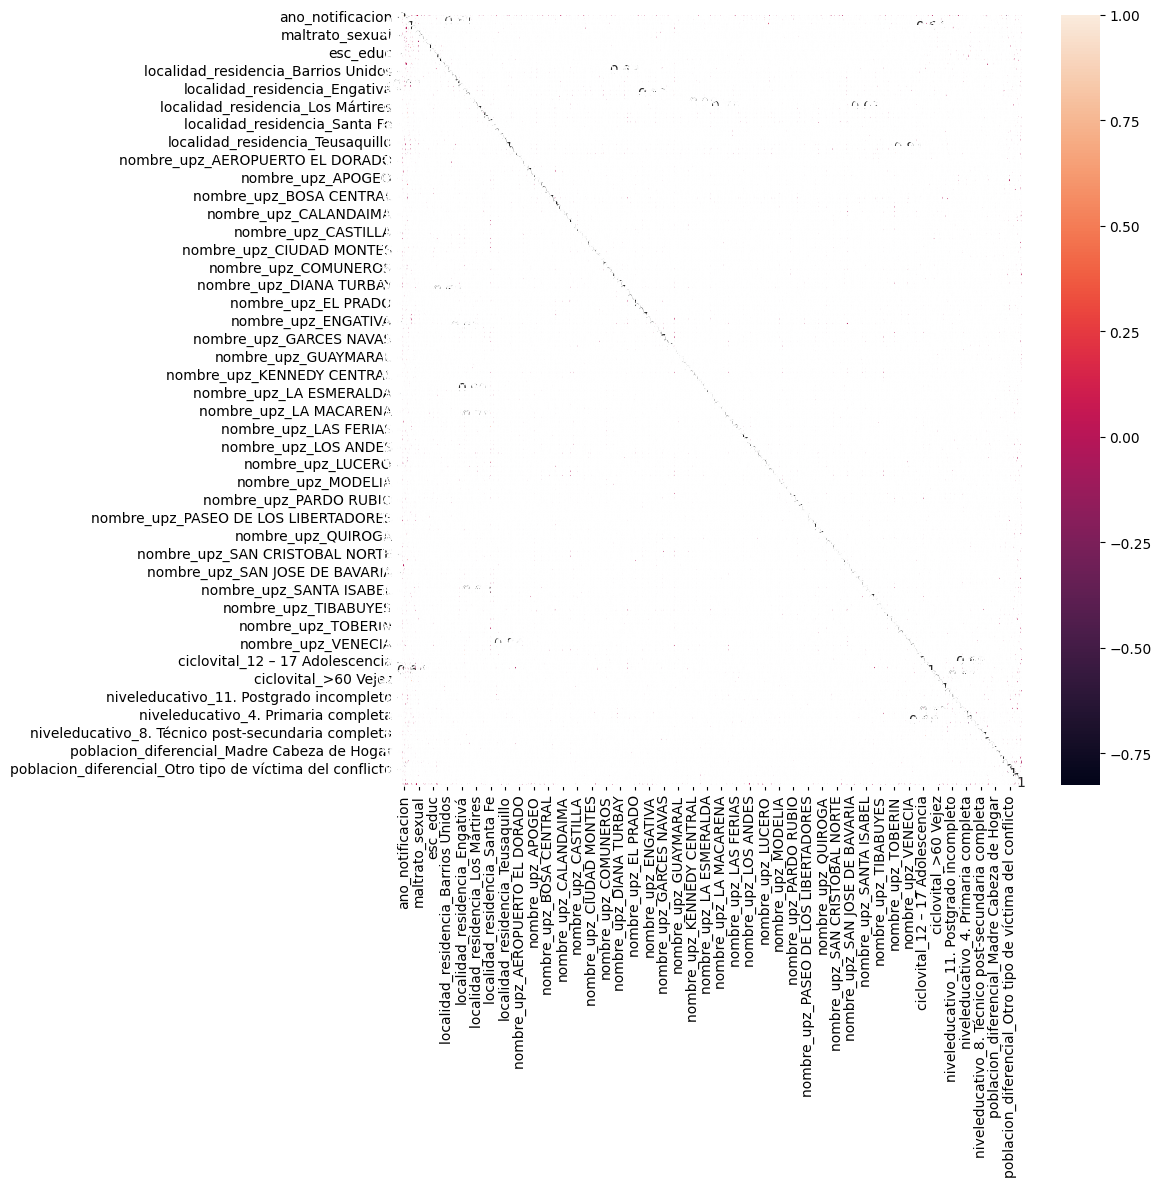

In [13]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data_num.corr(),annot=True)